In [1]:
# standard imports
import pandas as pd
import numpy as np

# user created functions
import wrangle

# imports for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed? 


Anything else I should be aware of?

# Acquire and Prepare

In [51]:
# Acquire and clean the data
df = wrangle.prep()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558436 entries, 2 to 847324
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        558436 non-null  object 
 1   cohort      558436 non-null  float64
 2   user        558436 non-null  int64  
 3   ip          558436 non-null  object 
 4   name        558436 non-null  object 
 5   start_date  558436 non-null  object 
 6   end_date    558436 non-null  object 
 7   program     558436 non-null  object 
 8   unit        558436 non-null  object 
 9   lesson      558436 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 46.9+ MB


In [3]:
df.head()

,date,cohort,user,ip,name,start_date,end_date,program,unit,lesson
2,2018-01-26 09:56:05,8.0,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,web_development,java-ii,object-oriented-programming
3,2018-01-26 09:56:06,8.0,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,web_development,slides,object_oriented_programming
4,2018-01-26 09:56:24,22.0,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,web_development,javascript-i,conditionals
5,2018-01-26 09:56:41,22.0,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,web_development,javascript-i,loops
6,2018-01-26 09:56:46,22.0,3,97.105.19.61,Teddy,2018-01-08,2018-05-17,web_development,javascript-i,conditionals


In [52]:
# convert all dates to datetime64 dtype
df = wrangle.convert_date(df, ['date', 'start_date', 'end_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558436 entries, 2 to 847324
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        558436 non-null  datetime64[ns]
 1   cohort      558436 non-null  float64       
 2   user        558436 non-null  int64         
 3   ip          558436 non-null  object        
 4   name        558436 non-null  object        
 5   start_date  558436 non-null  datetime64[ns]
 6   end_date    558436 non-null  datetime64[ns]
 7   program     558436 non-null  object        
 8   unit        558436 non-null  object        
 9   lesson      558436 non-null  object        
dtypes: datetime64[ns](3), float64(1), int64(1), object(5)
memory usage: 46.9+ MB


# Explore

## 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [53]:
# creates a dataframe with only web_dev users
web_dev = df[df.program == 'web_development']
web_dev.head()

,date,cohort,user,ip,name,start_date,end_date,program,unit,lesson
2,2018-01-26 09:56:05,8.0,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,web_development,java-ii,object-oriented-programming
3,2018-01-26 09:56:06,8.0,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,web_development,slides,object_oriented_programming
4,2018-01-26 09:56:24,22.0,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,web_development,javascript-i,conditionals
5,2018-01-26 09:56:41,22.0,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,web_development,javascript-i,loops
6,2018-01-26 09:56:46,22.0,3,97.105.19.61,Teddy,2018-01-08,2018-05-17,web_development,javascript-i,conditionals


In [54]:
# creates a dataframe with only data science students
ds = df[df.program == 'data_science']
ds.head()

,date,cohort,user,ip,name,start_date,end_date,program,unit,lesson
300236,2019-08-20 09:40:28,34.0,470,97.105.19.58,Bayes,2019-08-19,2020-01-30,data_science,3-sql,1-mysql-overview
300239,2019-08-20 09:40:30,34.0,467,97.105.19.58,Bayes,2019-08-19,2020-01-30,data_science,2-storytelling,bad-charts
300240,2019-08-20 09:40:30,34.0,467,97.105.19.58,Bayes,2019-08-19,2020-01-30,data_science,2-storytelling,misleading1_baseball.jpg
300241,2019-08-20 09:40:30,34.0,467,97.105.19.58,Bayes,2019-08-19,2020-01-30,data_science,2-storytelling,misleading1_fox.jpg
300242,2019-08-20 09:40:30,34.0,467,97.105.19.58,Bayes,2019-08-19,2020-01-30,data_science,2-storytelling,misleading3_deaths.jpg


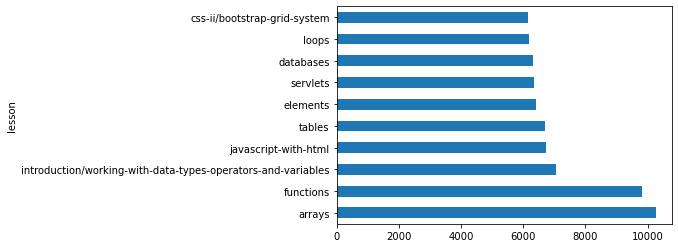

In [55]:
# visualizing the most accessed lessons via web dev students
web_dev.groupby('lesson')['cohort'].count().sort_values(ascending=False).head(10).plot.barh()
plt.show()

### Top 3 lessons for the Web Development course were the Arrays, Functions, Introduction/working-with-data-types-operators-and-variables 

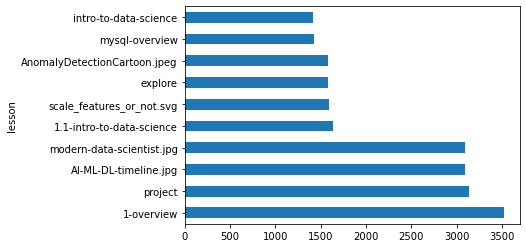

In [56]:
# visualizing the most accessed lessons via data science students
ds.groupby('lesson')['cohort'].count().sort_values(ascending=False).head(10).plot.barh()
plt.show()

### Top 3 lessons for the Data Science course were the Overview pages for each unit, the project pages for each unit, and the intro to data science lesson.  (With an honorable metion to the exploration lessons for each unit)

## 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [57]:
# creates a datafram that displays the lessons each cohort frequents the most
max_df = wrangle.max_df(df)
max_df.sort_values('number_of_hits', ascending=False)

,lesson,number_of_hits
name,,
Bayes,1-overview,1824
Curie,1-overview,1573
Darden,explore,967
Ceres,arrays,733
Fortuna,arrays,701
Florence,modern-data-scientist.jpg,688
Voyageurs,arrays,628
Teddy,arrays,570
Zion,arrays,555


In [58]:
# after targeting each lesson down the list of the max_df this was the lesson that stood out the most
min_df[min_df.lesson == 'html-css']

,lesson,number_of_hits
name,,
Badlands,html-css,1
Hampton,html-css,1
Jupiter,html-css,1
Marco,html-css,1
Xanadu,html-css,1


### Glacier and Joshua collectively accessed the html-css lesson 48 times where as most cohorts only accessed it once.

## 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

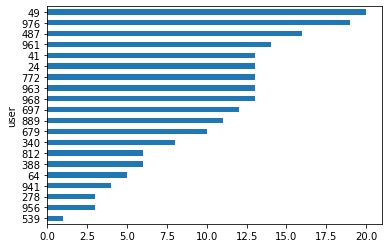

In [59]:
# creates a visual of students who access content the least amount of times during active periods of the program
active = df[(df.date >= df.start_date) & (df.date <= df.end_date)]
active.groupby('user').size().sort_values().head(20).plot.barh()
plt.show()

In [60]:
# taking a look at user 539
df[df.user == 539]

,date,cohort,user,ip,name,start_date,end_date,program,unit,lesson
361834,2019-11-04 16:54:45,52.0,539,97.105.19.58,Europa,2019-11-04,2020-04-17,web_development,html-css,elements


In [61]:
# taking a look at user 956
df[df.user == 956]

,date,cohort,user,ip,name,start_date,end_date,program,unit,lesson
838918,2021-04-15 14:55:05,139.0,956,162.200.114.251,Oberon,2021-04-12,2021-10-01,web_development,javascript-i,introduction/operators
838932,2021-04-15 14:56:04,139.0,956,162.200.114.251,Oberon,2021-04-12,2021-10-01,web_development,javascript-i,introduction/primitive-types
839105,2021-04-15 15:32:22,139.0,956,162.200.114.251,Oberon,2021-04-12,2021-10-01,web_development,javascript-i,introduction/operators


In [62]:
# taking a look at user 278
df[df.user == 278]

,date,cohort,user,ip,name,start_date,end_date,program,unit,lesson
127787,2018-09-27 14:47:37,24.0,278,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,web_development,java-ii,arrays
127801,2018-09-27 14:58:48,24.0,278,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,web_development,java-ii,arrays
127803,2018-09-27 14:59:07,24.0,278,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,web_development,java-ii,collections
137518,2018-10-16 18:56:22,24.0,278,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,web_development,javascript-ii,es6
137521,2018-10-16 18:57:00,24.0,278,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,web_development,javascript-ii,map-filter-reduce
137522,2018-10-16 18:57:02,24.0,278,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,web_development,javascript-ii,promises
137523,2018-10-16 18:57:04,24.0,278,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,web_development,javascript-ii,ajax-api
137524,2018-10-16 18:57:58,24.0,278,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,web_development,javascript-ii,modules
137526,2018-10-16 18:58:46,24.0,278,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,web_development,javascript-i,google-maps-api
137527,2018-10-16 19:01:49,24.0,278,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,web_development,javascript-i,coffee-project


### Either the users are accessing a lot of the material after their cohort has graduated or they aren't accessing the material at all presumably having left the program

## 4. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [37]:
df.head()

,date,cohort,user,ip,name,start_date,end_date,program,unit,lesson
2,2018-01-26 09:56:05,8.0,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,web_development,java-ii,object-oriented-programming
3,2018-01-26 09:56:06,8.0,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,web_development,slides,object_oriented_programming
4,2018-01-26 09:56:24,22.0,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,web_development,javascript-i,conditionals
5,2018-01-26 09:56:41,22.0,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,web_development,javascript-i,loops
6,2018-01-26 09:56:46,22.0,3,97.105.19.61,Teddy,2018-01-08,2018-05-17,web_development,javascript-i,conditionals


In [63]:
# Sorting the dataframe down to activity that only takes place after a user/student graduates 
after_grad = df[df.end_date < df.date]
after_grad.head()

,date,cohort,user,ip,name,start_date,end_date,program,unit,lesson
2,2018-01-26 09:56:05,8.0,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,web_development,java-ii,object-oriented-programming
3,2018-01-26 09:56:06,8.0,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,web_development,slides,object_oriented_programming
33,2018-01-26 10:15:02,1.0,11,97.105.19.61,Arches,2014-02-04,2014-04-22,web_development,javascript-i,functions
58,2018-01-26 10:40:15,8.0,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,web_development,javascript-i,functions
116,2018-01-26 11:36:38,18.0,26,97.105.19.61,Pinnacles,2017-03-27,2017-07-20,web_development,javascript-i,functions


In [64]:
# Identifying the material accessed by web dev students after graduation
after_grad[after_grad.program == 'web_development'].unit.unique()

array(['java-ii', 'slides', 'javascript-i', 'appendix', 'content',
       'spring', 'teams', 'jquery', 'mysql', 'javascript-ii', 'git',
       'prework', 'examples', 'html-css', 'java-iii', 'java-i', 'assets',
       'javascript', 'students', 'uploads', 'student', 'html', 'cohorts',
       'fundamentals', 'capstone', 'web-design', '1-fundamentals',
       '2-stats', '3-sql', '5-regression', '2-storytelling',
       '6-regression', '10-anomaly-detection', '11-nlp', '5-stats',
       '13-advanced-topics', 'quiz', '7-classification', '4-python',
       'php_i', 'professional-development', 'bom-and-dom',
       'further-reading', 'css-i', 'css-ii', 'python', 'sgithubtudents',
       'sql', 'classification', 'nlp', 'code-standards'], dtype=object)

In [65]:
# Identifying the material accessed by data science students after graduation
after_grad[after_grad.program == 'data_science'].unit.unique()

array(['1-fundamentals', '4-python', '3-sql', '8-clustering',
       '6-regression', '9-timeseries', '11-nlp', 'appendix',
       '10-anomaly-detection', '2-storytelling', '7-classification',
       '12-distributed-ml', '13-advanced-topics', '5-stats',
       'fundamentals', 'sql', 'python', 'timeseries', 'stats',
       'classification', 'regression', 'storytelling', 'clustering',
       'anomaly-detection', 'nlp', 'distributed-ml', 'advanced-topics',
       'cli', 'capstones', 'individual-project'], dtype=object)

### 5. Which lessons are least accessed? 

In [66]:
# filtering the data down to the lessons that are accessed the least amount of times
df.lesson.value_counts(ascending=True).head(10)

css/..%255c                         1
6.1-prepare-part-1                  1
5-inspect                           1
4-acquire                           1
3-getting-started                   1
6.2-prophet                         1
6.1-parametric-modeling             1
mysql/relationships/indexes.html    1
4-navigating-the-filesystem         1
cli/2-overview                      1
Name: lesson, dtype: int64

In [67]:
# Looking at what 'css/..%c0%af' is
df[df.lesson == 'css/..%c0%af']

,date,cohort,user,ip,name,start_date,end_date,program,unit,lesson
213402,2019-03-22 11:42:09,31.0,373,97.105.19.58,Andromeda,2019-03-18,2019-07-30,web_development,examples,css/..%c0%af


In [68]:
# Looking deeper into the specific lesson to draw conclusions
df[df.lesson == '5-inspect']

,date,cohort,user,ip,name,start_date,end_date,program,unit,lesson
327669,2019-09-23 00:40:20,34.0,484,70.117.31.136,Bayes,2019-08-19,2020-01-30,data_science,12-distributed-ml,5-inspect


In [69]:
# Looking deeper into the specific lesson to draw conclusions
df[df.unit == '12-distributed-ml']

,date,cohort,user,ip,name,start_date,end_date,program,unit,lesson
327508,2019-09-22 22:18:55,34.0,484,70.117.31.136,Bayes,2019-08-19,2020-01-30,data_science,12-distributed-ml,topic-modeling
327665,2019-09-23 00:38:58,34.0,484,70.117.31.136,Bayes,2019-08-19,2020-01-30,data_science,12-distributed-ml,1-overview
327666,2019-09-23 00:39:36,34.0,484,70.117.31.136,Bayes,2019-08-19,2020-01-30,data_science,12-distributed-ml,2-environment-setup
327667,2019-09-23 00:39:52,34.0,484,70.117.31.136,Bayes,2019-08-19,2020-01-30,data_science,12-distributed-ml,3-getting-started
327668,2019-09-23 00:40:07,34.0,484,70.117.31.136,Bayes,2019-08-19,2020-01-30,data_science,12-distributed-ml,4-acquire
...,...,...,...,...,...,...,...,...,...,...
582945,2020-07-23 22:36:19,34.0,467,173.173.105.24,Bayes,2019-08-19,2020-01-30,data_science,12-distributed-ml,3-spark-api
582946,2020-07-23 22:37:10,34.0,467,173.173.105.24,Bayes,2019-08-19,2020-01-30,data_science,12-distributed-ml,1-overview
582947,2020-07-23 22:37:10,34.0,467,173.173.105.24,Bayes,2019-08-19,2020-01-30,data_science,12-distributed-ml,spark-execution-diagram.svg
582948,2020-07-23 22:37:10,34.0,467,173.173.105.24,Bayes,2019-08-19,2020-01-30,data_science,12-distributed-ml,spark-local-mode.svg


In [70]:
# Calculating how much of the overall dataset that distributed ML lessons make up
df[df.unit == '12-distributed-ml'].size / df.size

0.0017835526362913565

### The lessons least accessed are the Distributed ML lessons towards the end of the data science track.  These lessons make up .18% of the overall accessed content.